In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from itertools import combinations
from collections import Counter

In [ ]:
C:\Users\USER\Documents\Data Analysis\report
report\report.csv
Sales_Data

In [8]:
# from numpy import row_stack


# df =pd.read_csv("report.csv")
# df.head(9)

# # head for the first rows
# # tail for the last

all_df = pd.DataFrame()
for file_name in os.listdir(r"Sales_Data"):
    # print(file_name)
    month_df = pd.read_csv(rf'Sales_Data/{file_name}')   
    all_df =pd.concat([all_df,month_df],ignore_index= True)      
all_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
all_df.dropna(axis =0,inplace= True)
# # for dropping missing values either row or coulmn
# inplace = true means whatever modification made save it
# rows = 0 for axis
# column =1 for axis

In [10]:
all_df.isnull().sum()
# method for returning missing records

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
all_df.shape
# for the shape of your database

(186305, 6)

In [12]:

all_df['Quantity Ordered'] = pd.to_numeric(all_df['Quantity Ordered'],errors ='coerce')
all_df['Price Each'] = pd.to_numeric(all_df['Price Each'],errors ='coerce')
all_df['Order Date'] = pd.to_datetime(all_df['Order Date'],format= '%m/%d/%y %H:%M', errors='coerce')
all_df["Month"] = all_df['Order Date'].dt.month
all_df["Hour"] = all_df["Order Date"].dt.hour



In [13]:
all_df = all_df.astype({"Month":int},errors ='raise')
all_df = all_df.astype({"Hour":int},errors='raise')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
def extract_city(address):
        return f"{address.split(',')[1].strip()} {address.split(',')[2].split()[0]}"

In [ ]:
all_df["City"] = all_df['Purchase Address'].apply(extract_city)
all_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,Los Angeles CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,20,Los Angeles CA
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,16,San Francisco CA
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,7,San Francisco CA
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,17,San Francisco CA


In [ ]:
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,Dallas TX
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,Boston MA
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles CA
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles CA
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,Los Angeles CA


In [ ]:
all_df['Total'] = all_df['Quantity Ordered'] * all_df['Price Each']
all_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City,Total
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,8,Dallas TX,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,22,Boston MA,99.99
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles CA,600.00
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,14,Los Angeles CA,11.99
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,9,Los Angeles CA,11.99


In [ ]:
all_df.dtypes
# .dtypes brings the type of data type

Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Month                        int32
Hour                         int32
City                        object
Total                      float64
dtype: object

In [ ]:
# ILOC MEthod is indexing using position
# loc method is indexing using the name
all_df.loc[186846]


Order ID                                             259354
Product                                              iPhone
Quantity Ordered                                        1.0
Price Each                                            700.0
Order Date                              2019-09-01 16:00:00
Purchase Address    216 Dogwood St, San Francisco, CA 94016
Month                                                     9
Hour                                                     16
City                                       San Francisco CA
Total                                                 700.0
Name: 186846, dtype: object

In [ ]:
# conditional selection
df =all_df[all_df['Order ID']== '176560'][['Order ID','Product','Total']]
df

,Order ID,Product,Total
3,176560,Google Phone,600.00
4,176560,Wired Headphones,11.99


In [ ]:
all_df[all_df['Month']==1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City,Total
31957,297150,Lightning Charging Cable,1.0,14.95,2020-01-01 00:38:00,"427 Wilson St, Dallas, TX 75001",1,0,Dallas TX,14.95
32659,297817,iPhone,1.0,700.00,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001",1,0,New York City NY,700.00
32660,297817,Lightning Charging Cable,2.0,14.95,2020-01-01 00:22:00,"519 13th St, New York City, NY 10001",1,0,New York City NY,29.90
32819,297969,Google Phone,1.0,600.00,2020-01-01 00:54:00,"542 2nd St, San Francisco, CA 94016",1,0,San Francisco CA,600.00
33200,298344,Wired Headphones,4.0,11.99,2020-01-01 03:34:00,"731 7th St, New York City, NY 10001",1,3,New York City NY,47.96
...,...,...,...,...,...,...,...,...,...,...
77265,150497,20in Monitor,1.0,109.99,2019-01-26 19:09:00,"95 8th St, Dallas, TX 75001",1,19,Dallas TX,109.99
77266,150498,27in FHD Monitor,1.0,149.99,2019-01-10 22:58:00,"403 7th St, San Francisco, CA 94016",1,22,San Francisco CA,149.99
77267,150499,ThinkPad Laptop,1.0,999.99,2019-01-21 14:31:00,"214 Main St, Portland, OR 97035",1,14,Portland OR,999.99
77268,150500,AAA Batteries (4-pack),2.0,2.99,2019-01-15 14:21:00,"810 2nd St, Los Angeles, CA 90001",1,14,Los Angeles CA,5.98


In [ ]:
# 1
month_df = all_df.groupby(['Month']).sum()[['Total']]
month_df

,Total
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


In [ ]:
# creating a bar chart
month = month_df.index
total = month_df['Total'].values

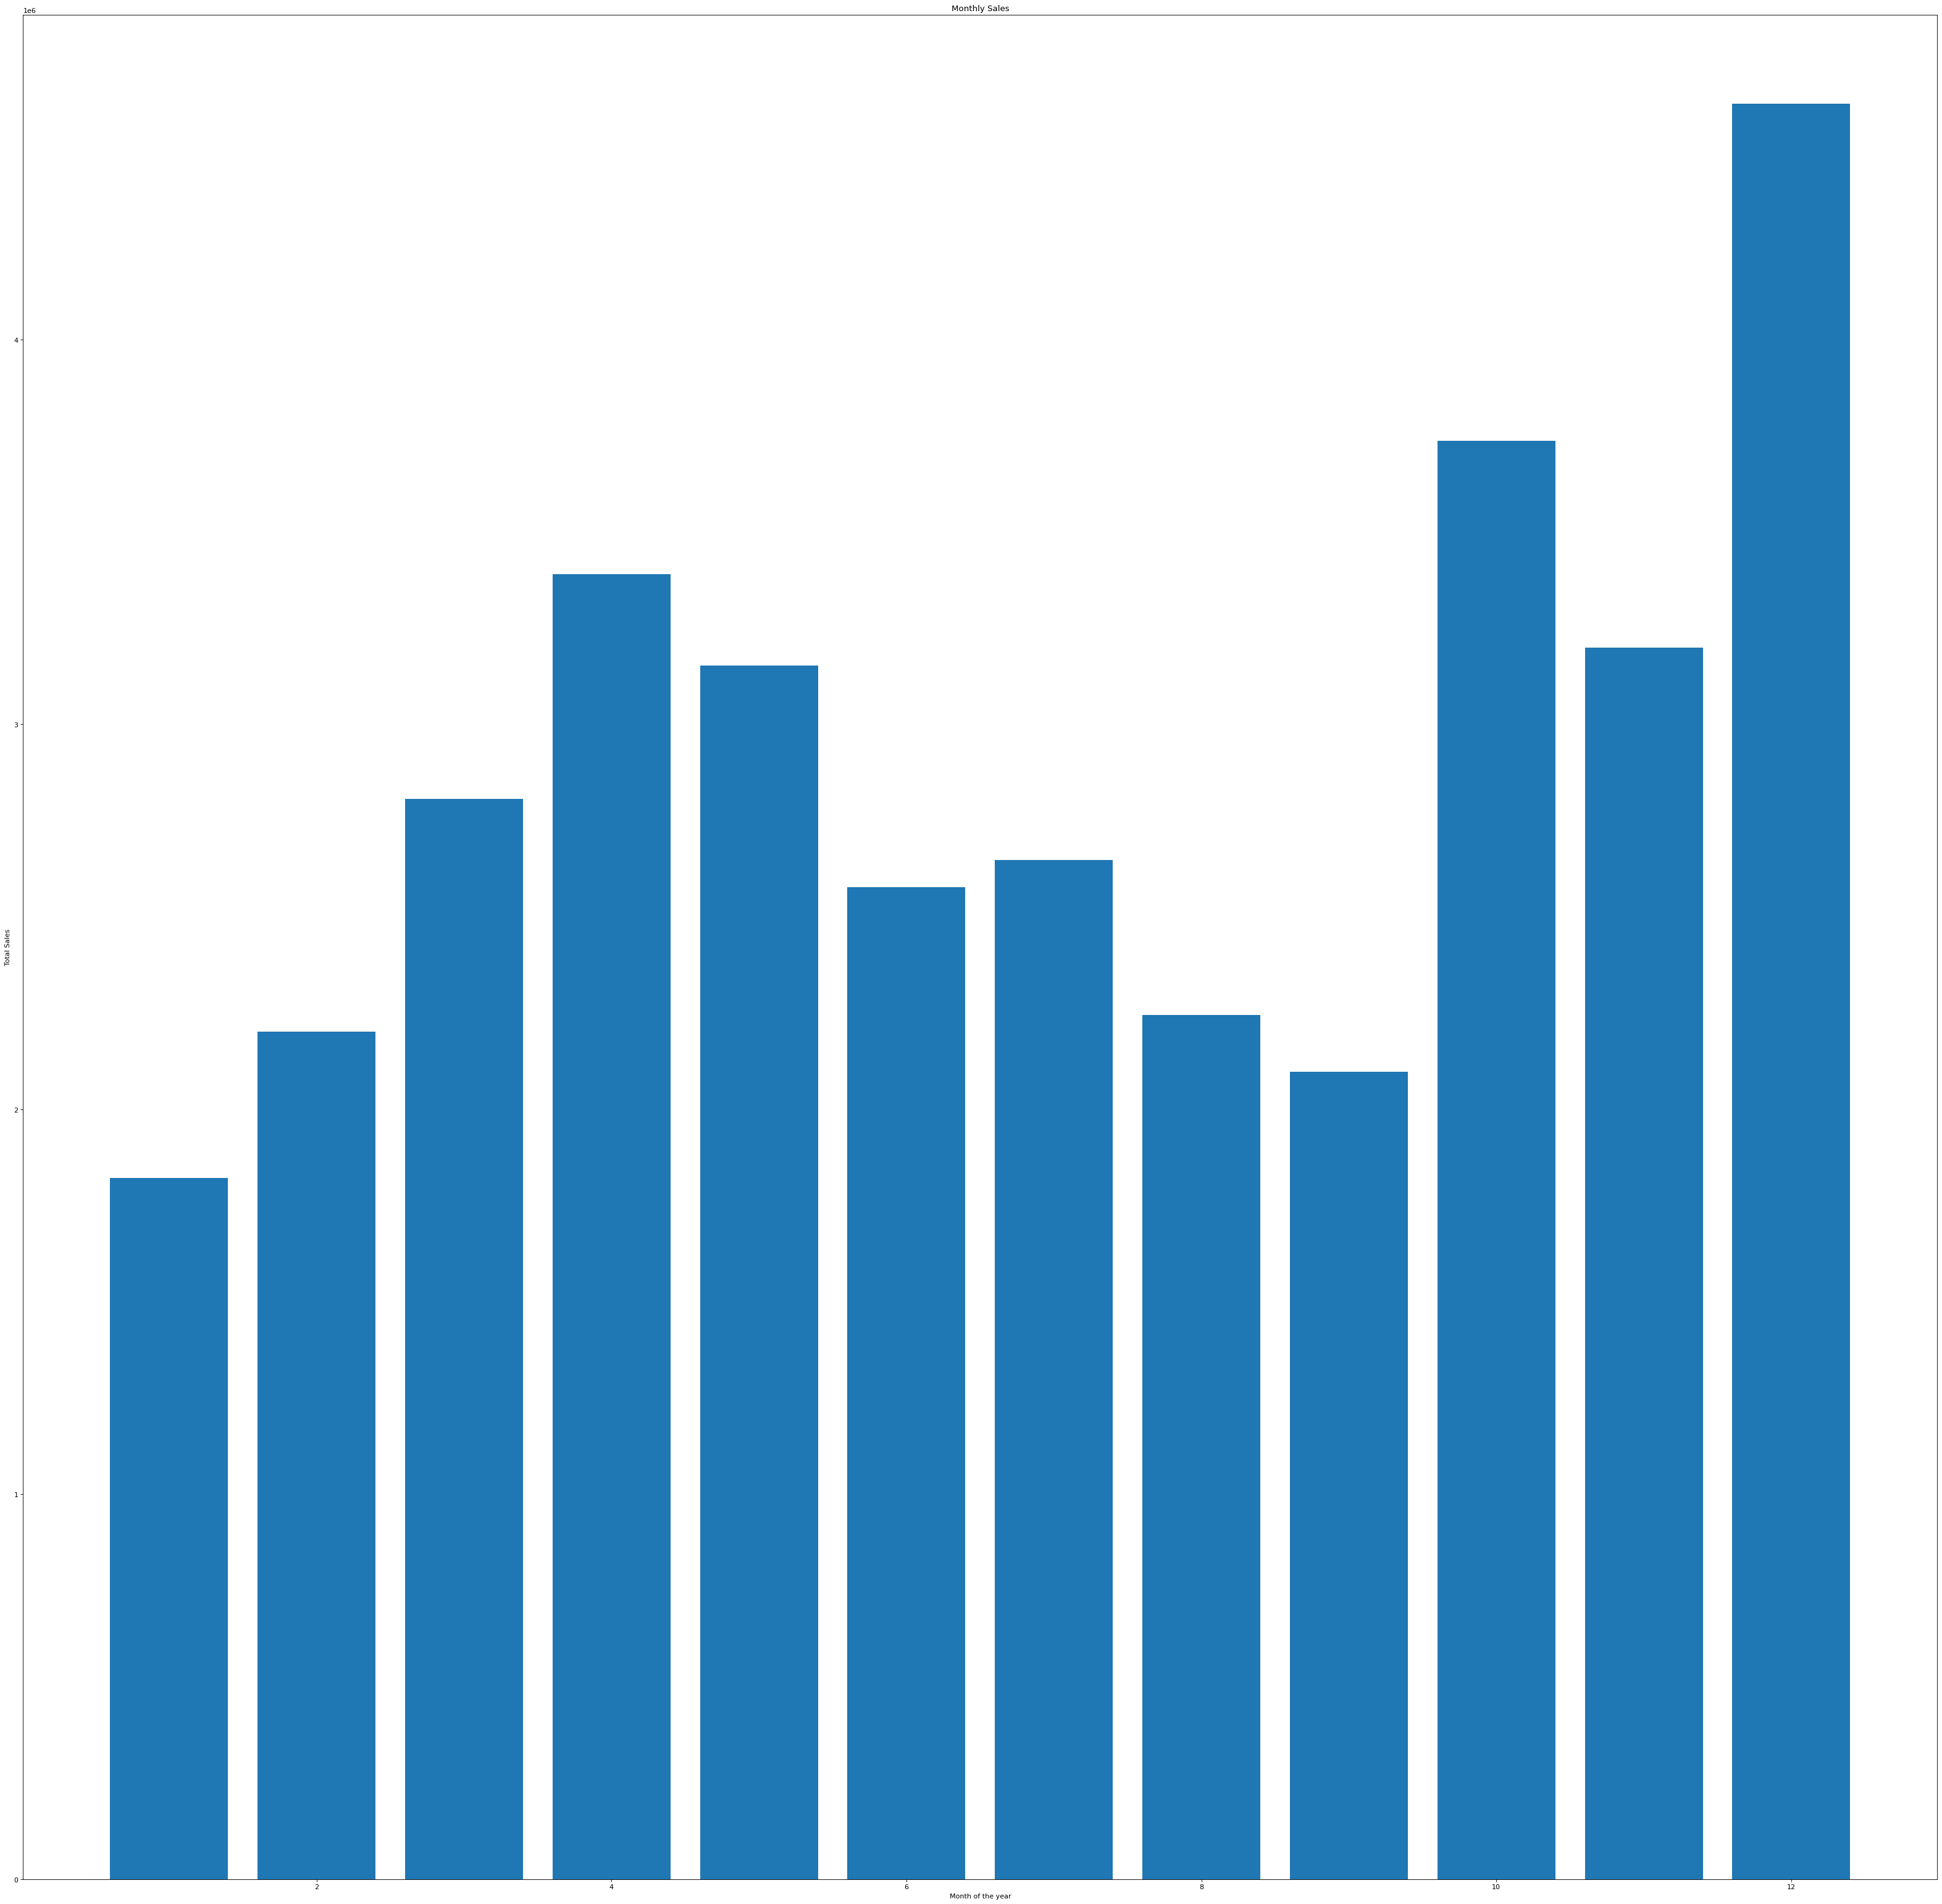

In [ ]:
plt.figure(figsize=(50,50),dpi=80)
plt.bar(x=month,height=total)

plt.xlabel('Month of the year')
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.show()


In [ ]:
product_df = all_df.groupby(['Product']).sum()[['Total']]
product_df

,Total
Product,
20in Monitor,454148.71
27in 4K Gaming Monitor,2435097.56
27in FHD Monitor,1132424.50
34in Ultrawide Monitor,2355558.01
AA Batteries (4-pack),106118.40
AAA Batteries (4-pack),92740.83
Apple Airpods Headphones,2349150.00
Bose SoundSport Headphones,1345565.43
Flatscreen TV,1445700.00


In [ ]:
product = product_df.index
total = product_df['Total'].values

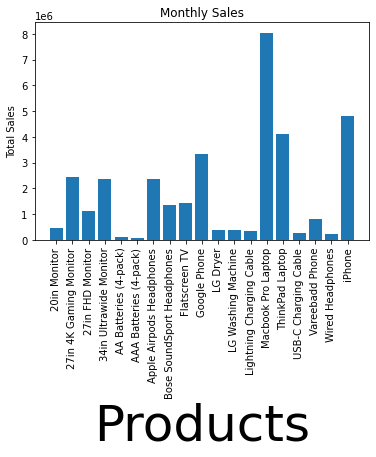

In [ ]:
# plt.figure(figsize=(50,50),dpi=80)
plt.bar(x=product,height=total)

plt.xlabel('Products',fontsize =50)
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(product,rotation ='vertical')
plt.show()


In [ ]:
# nunique gives you the number of independent variables
# unique give names of the variables


In [ ]:
# 1
city_df = all_df.groupby(['City']).sum()[['Total']]
city_df

,Total
City,
Atlanta GA,2795498.58
Austin TX,1819581.75
Boston MA,3661642.01
Dallas TX,2767975.40
Los Angeles CA,5452570.80
New York City NY,4664317.43
Portland ME,449758.27
Portland OR,1870732.34
San Francisco CA,8262203.91


In [ ]:
city = city_df.index
total = city_df['Total'].values

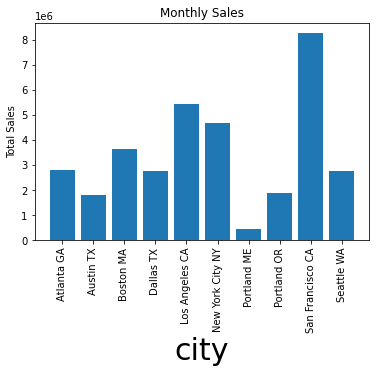

,Total
City,
San Francisco CA,8262203.91


In [ ]:
# plt.figure(figsize=(50,50),dpi=80)
plt.bar(x=city,height=total)

plt.xlabel('city',fontsize =30)
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(city,rotation ='vertical')
plt.show()
city_df[city_df["Total"]==city_df["Total"].max()]


In [ ]:
all_df[all_df['Total']==all_df['Total'].max()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City,Total
4717,181069,Macbook Pro Laptop,2.0,1700.0,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,21,San Francisco CA,3400.0
5219,181544,Macbook Pro Laptop,2.0,1700.0,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",4,12,New York City NY,3400.0
92026,210292,Macbook Pro Laptop,2.0,1700.0,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",6,9,San Francisco CA,3400.0
127265,200528,Macbook Pro Laptop,2.0,1700.0,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",5,13,Boston MA,3400.0


In [ ]:
price_df = all_df.groupby(["Product","Price Each"]).nunique()
# price_df =price_df.reset_index()
# price_df[['Price Each','Product']]
product_price=list(price_df.index)
product_price

[('20in Monitor', 109.99),
 ('27in 4K Gaming Monitor', 389.99),
 ('27in FHD Monitor', 149.99),
 ('34in Ultrawide Monitor', 379.99),
 ('AA Batteries (4-pack)', 3.84),
 ('AAA Batteries (4-pack)', 2.99),
 ('Apple Airpods Headphones', 150.0),
 ('Bose SoundSport Headphones', 99.99),
 ('Flatscreen TV', 300.0),
 ('Google Phone', 600.0),
 ('LG Dryer', 600.0),
 ('LG Washing Machine', 600.0),
 ('Lightning Charging Cable', 14.95),
 ('Macbook Pro Laptop', 1700.0),
 ('ThinkPad Laptop', 999.99),
 ('USB-C Charging Cable', 11.95),
 ('Vareebadd Phone', 400.0),
 ('Wired Headphones', 11.99),
 ('iPhone', 700.0)]

In [ ]:
price_df.index.get_level_values('Price Each')

Float64Index([109.99, 389.99, 149.99, 379.99,   3.84,   2.99,  150.0,  99.99,
               300.0,  600.0,  600.0,  600.0,  14.95, 1700.0, 999.99,  11.95,
               400.0,  11.99,  700.0],
             dtype='float64', name='Price Each')

In [ ]:
# d = dict(product_price)
# print(d)
# product = list(d.keys())
# price =list(d.values())

{'20in Monitor': 109.99, '27in 4K Gaming Monitor': 389.99, '27in FHD Monitor': 149.99, '34in Ultrawide Monitor': 379.99, 'AA Batteries (4-pack)': 3.84, 'AAA Batteries (4-pack)': 2.99, 'Apple Airpods Headphones': 150.0, 'Bose SoundSport Headphones': 99.99, 'Flatscreen TV': 300.0, 'Google Phone': 600.0, 'LG Dryer': 600.0, 'LG Washing Machine': 600.0, 'Lightning Charging Cable': 14.95, 'Macbook Pro Laptop': 1700.0, 'ThinkPad Laptop': 999.99, 'USB-C Charging Cable': 11.95, 'Vareebadd Phone': 400.0, 'Wired Headphones': 11.99, 'iPhone': 700.0}


In [ ]:
# d.values()

dict_values([109.99, 389.99, 149.99, 379.99, 3.84, 2.99, 150.0, 99.99, 300.0, 600.0, 600.0, 600.0, 14.95, 1700.0, 999.99, 11.95, 400.0, 11.99, 700.0])

In [ ]:
# price

[109.99,
 389.99,
 149.99,
 379.99,
 3.84,
 2.99,
 150.0,
 99.99,
 300.0,
 600.0,
 600.0,
 600.0,
 14.95,
 1700.0,
 999.99,
 11.95,
 400.0,
 11.99,
 700.0]

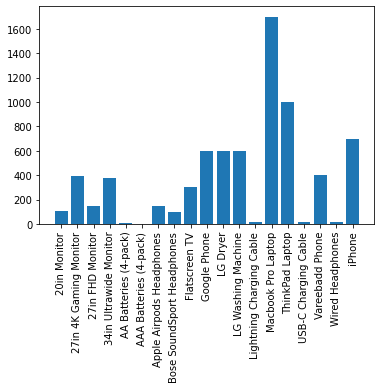

In [ ]:
plt.bar(product,price)
plt.xticks(product,rotation ='vertical')
plt.show()

In [ ]:
a = range(1,13)
for i in a:
    month_1=all_df[all_df['Month']==i]
    qd = month_1.groupby(["Product"]).sum().reset_index()
    b = qd[qd["Quantity Ordered"]==qd["Quantity Ordered"].max()]["Product"].values
    print(f"The most sold product for month{i} is {b}")

The most sold product for month1 is ['AAA Batteries (4-pack)']
The most sold product for month2 is ['AAA Batteries (4-pack)']
The most sold product for month3 is ['AAA Batteries (4-pack)']
The most sold product for month4 is ['AAA Batteries (4-pack)']
The most sold product for month5 is ['AAA Batteries (4-pack)']
The most sold product for month6 is ['AAA Batteries (4-pack)']
The most sold product for month7 is ['AAA Batteries (4-pack)']
The most sold product for month8 is ['AAA Batteries (4-pack)']
The most sold product for month9 is ['AAA Batteries (4-pack)']
The most sold product for month10 is ['AAA Batteries (4-pack)']
The most sold product for month11 is ['AAA Batteries (4-pack)']
The most sold product for month12 is ['AAA Batteries (4-pack)']


In [ ]:
all_df.sort_values(by =['Price Each'],ascending= False)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City,Total
160130,264454,Macbook Pro Laptop,1.0,1700.00,2019-10-24 16:22:00,"49 Highland St, Los Angeles, CA 90001",10,16,Los Angeles CA,1700.00
30968,296210,Macbook Pro Laptop,1.0,1700.00,2019-12-18 11:41:00,"763 Cherry St, San Francisco, CA 94016",12,11,San Francisco CA,1700.00
140070,281623,Macbook Pro Laptop,1.0,1700.00,2019-11-04 08:22:00,"969 Wilson St, Dallas, TX 75001",11,8,Dallas TX,1700.00
183797,256433,Macbook Pro Laptop,1.0,1700.00,2019-09-19 10:55:00,"586 12th St, Los Angeles, CA 90001",9,10,Los Angeles CA,1700.00
107437,164076,Macbook Pro Laptop,1.0,1700.00,2019-03-09 11:21:00,"908 Forest St, San Francisco, CA 94016",3,11,San Francisco CA,1700.00
...,...,...,...,...,...,...,...,...,...,...
66561,161073,AAA Batteries (4-pack),1.0,2.99,2019-02-17 14:13:00,"278 Hill St, San Francisco, CA 94016",2,14,San Francisco CA,2.99
157818,262244,AAA Batteries (4-pack),2.0,2.99,2019-10-22 12:03:00,"38 Sunset St, Seattle, WA 98101",10,12,Seattle WA,5.98
66599,161109,AAA Batteries (4-pack),3.0,2.99,2019-02-24 17:11:00,"42 4th St, Seattle, WA 98101",2,17,Seattle WA,8.97
157813,262240,AAA Batteries (4-pack),1.0,2.99,2019-10-24 11:49:00,"626 Hill St, New York City, NY 10001",10,11,New York City NY,2.99


In [ ]:
all_df.sort_values(by =['Price Each','Quantity Ordered'],ascending=[False,True])

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Hour,City,Total
9,176565,Macbook Pro Laptop,1.0,1700.00,2019-04-24 10:38:00,"915 Willow St, San Francisco, CA 94016",4,10,San Francisco CA,1700.00
86,176639,Macbook Pro Laptop,1.0,1700.00,2019-04-28 16:14:00,"853 Cedar St, San Francisco, CA 94016",4,16,San Francisco CA,1700.00
90,176643,Macbook Pro Laptop,1.0,1700.00,2019-04-27 21:32:00,"373 Adams St, Boston, MA 02215",4,21,Boston MA,1700.00
93,176646,Macbook Pro Laptop,1.0,1700.00,2019-04-22 07:14:00,"657 Adams St, Portland, OR 97035",4,7,Portland OR,1700.00
136,176687,Macbook Pro Laptop,1.0,1700.00,2019-04-30 10:26:00,"121 Wilson St, Los Angeles, CA 90001",4,10,Los Angeles CA,1700.00
...,...,...,...,...,...,...,...,...,...,...
156970,261442,AAA Batteries (4-pack),8.0,2.99,2019-10-16 20:31:00,"36 Center St, Boston, MA 02215",10,20,Boston MA,23.92
174926,278566,AAA Batteries (4-pack),8.0,2.99,2019-10-13 19:07:00,"992 Park St, Los Angeles, CA 90001",10,19,Los Angeles CA,23.92
81010,226483,AAA Batteries (4-pack),9.0,2.99,2019-07-20 23:28:00,"867 Sunset St, San Francisco, CA 94016",7,23,San Francisco CA,26.91
81646,227096,AAA Batteries (4-pack),9.0,2.99,2019-07-29 09:50:00,"60 10th St, San Francisco, CA 94016",7,9,San Francisco CA,26.91


In [ ]:
d =all_df.groupby(['Month','Product']).sum()[['Quantity Ordered','Total']].reset_index()


In [ ]:
d1 = d.groupby(['Month','Product']).sum()[['Quantity Ordered','Total']].reset_index()

In [ ]:
d1 =d.groupby('Month')[['Product','Quantity Ordered','Total']].apply(lambda x:x.sort_values(['Quantity Ordered'],ascending = False))

In [ ]:
d1= d1.reset_index()
d1.groupby('Month').head(1)[['Month','Product','Quantity Ordered','Total']]


,Month,Product,Quantity Ordered,Total
0,1,AAA Batteries (4-pack),1600.0,4784.00
19,2,AAA Batteries (4-pack),1972.0,5896.28
38,3,AAA Batteries (4-pack),2479.0,7412.21
57,4,AAA Batteries (4-pack),2939.0,8787.61
76,5,AAA Batteries (4-pack),2927.0,8751.73
95,6,AAA Batteries (4-pack),2162.0,6464.38
114,7,AAA Batteries (4-pack),2365.0,7071.35
133,8,AAA Batteries (4-pack),2021.0,6042.79
152,9,AAA Batteries (4-pack),1923.0,5749.77
171,10,AAA Batteries (4-pack),3363.0,10055.37


In [ ]:
Hour_df = all_df.groupby(["Hour"]).sum()
Hour_df.reset_index()

,Hour,Quantity Ordered,Price Each,Month,Total
0,0,4428.0,709296.70,27554,713721.27
1,1,2619.0,458490.00,16657,460866.88
2,2,1398.0,233833.64,8507,234851.44
3,3,928.0,144726.42,5904,145757.89
4,4,937.0,162058.18,6148,162661.01
5,5,1493.0,229621.21,9301,230679.82
6,6,2810.0,445000.11,17539,448113.00
7,7,4556.0,740568.11,28850,744854.12
8,8,7002.0,1185970.62,43626,1192348.97
9,9,9816.0,1628498.49,60981,1639030.58


,Quantity Ordered,Price Each,Month,Total
Hour,,,,
19,14470.0,2398588.31,91389,2412938.54


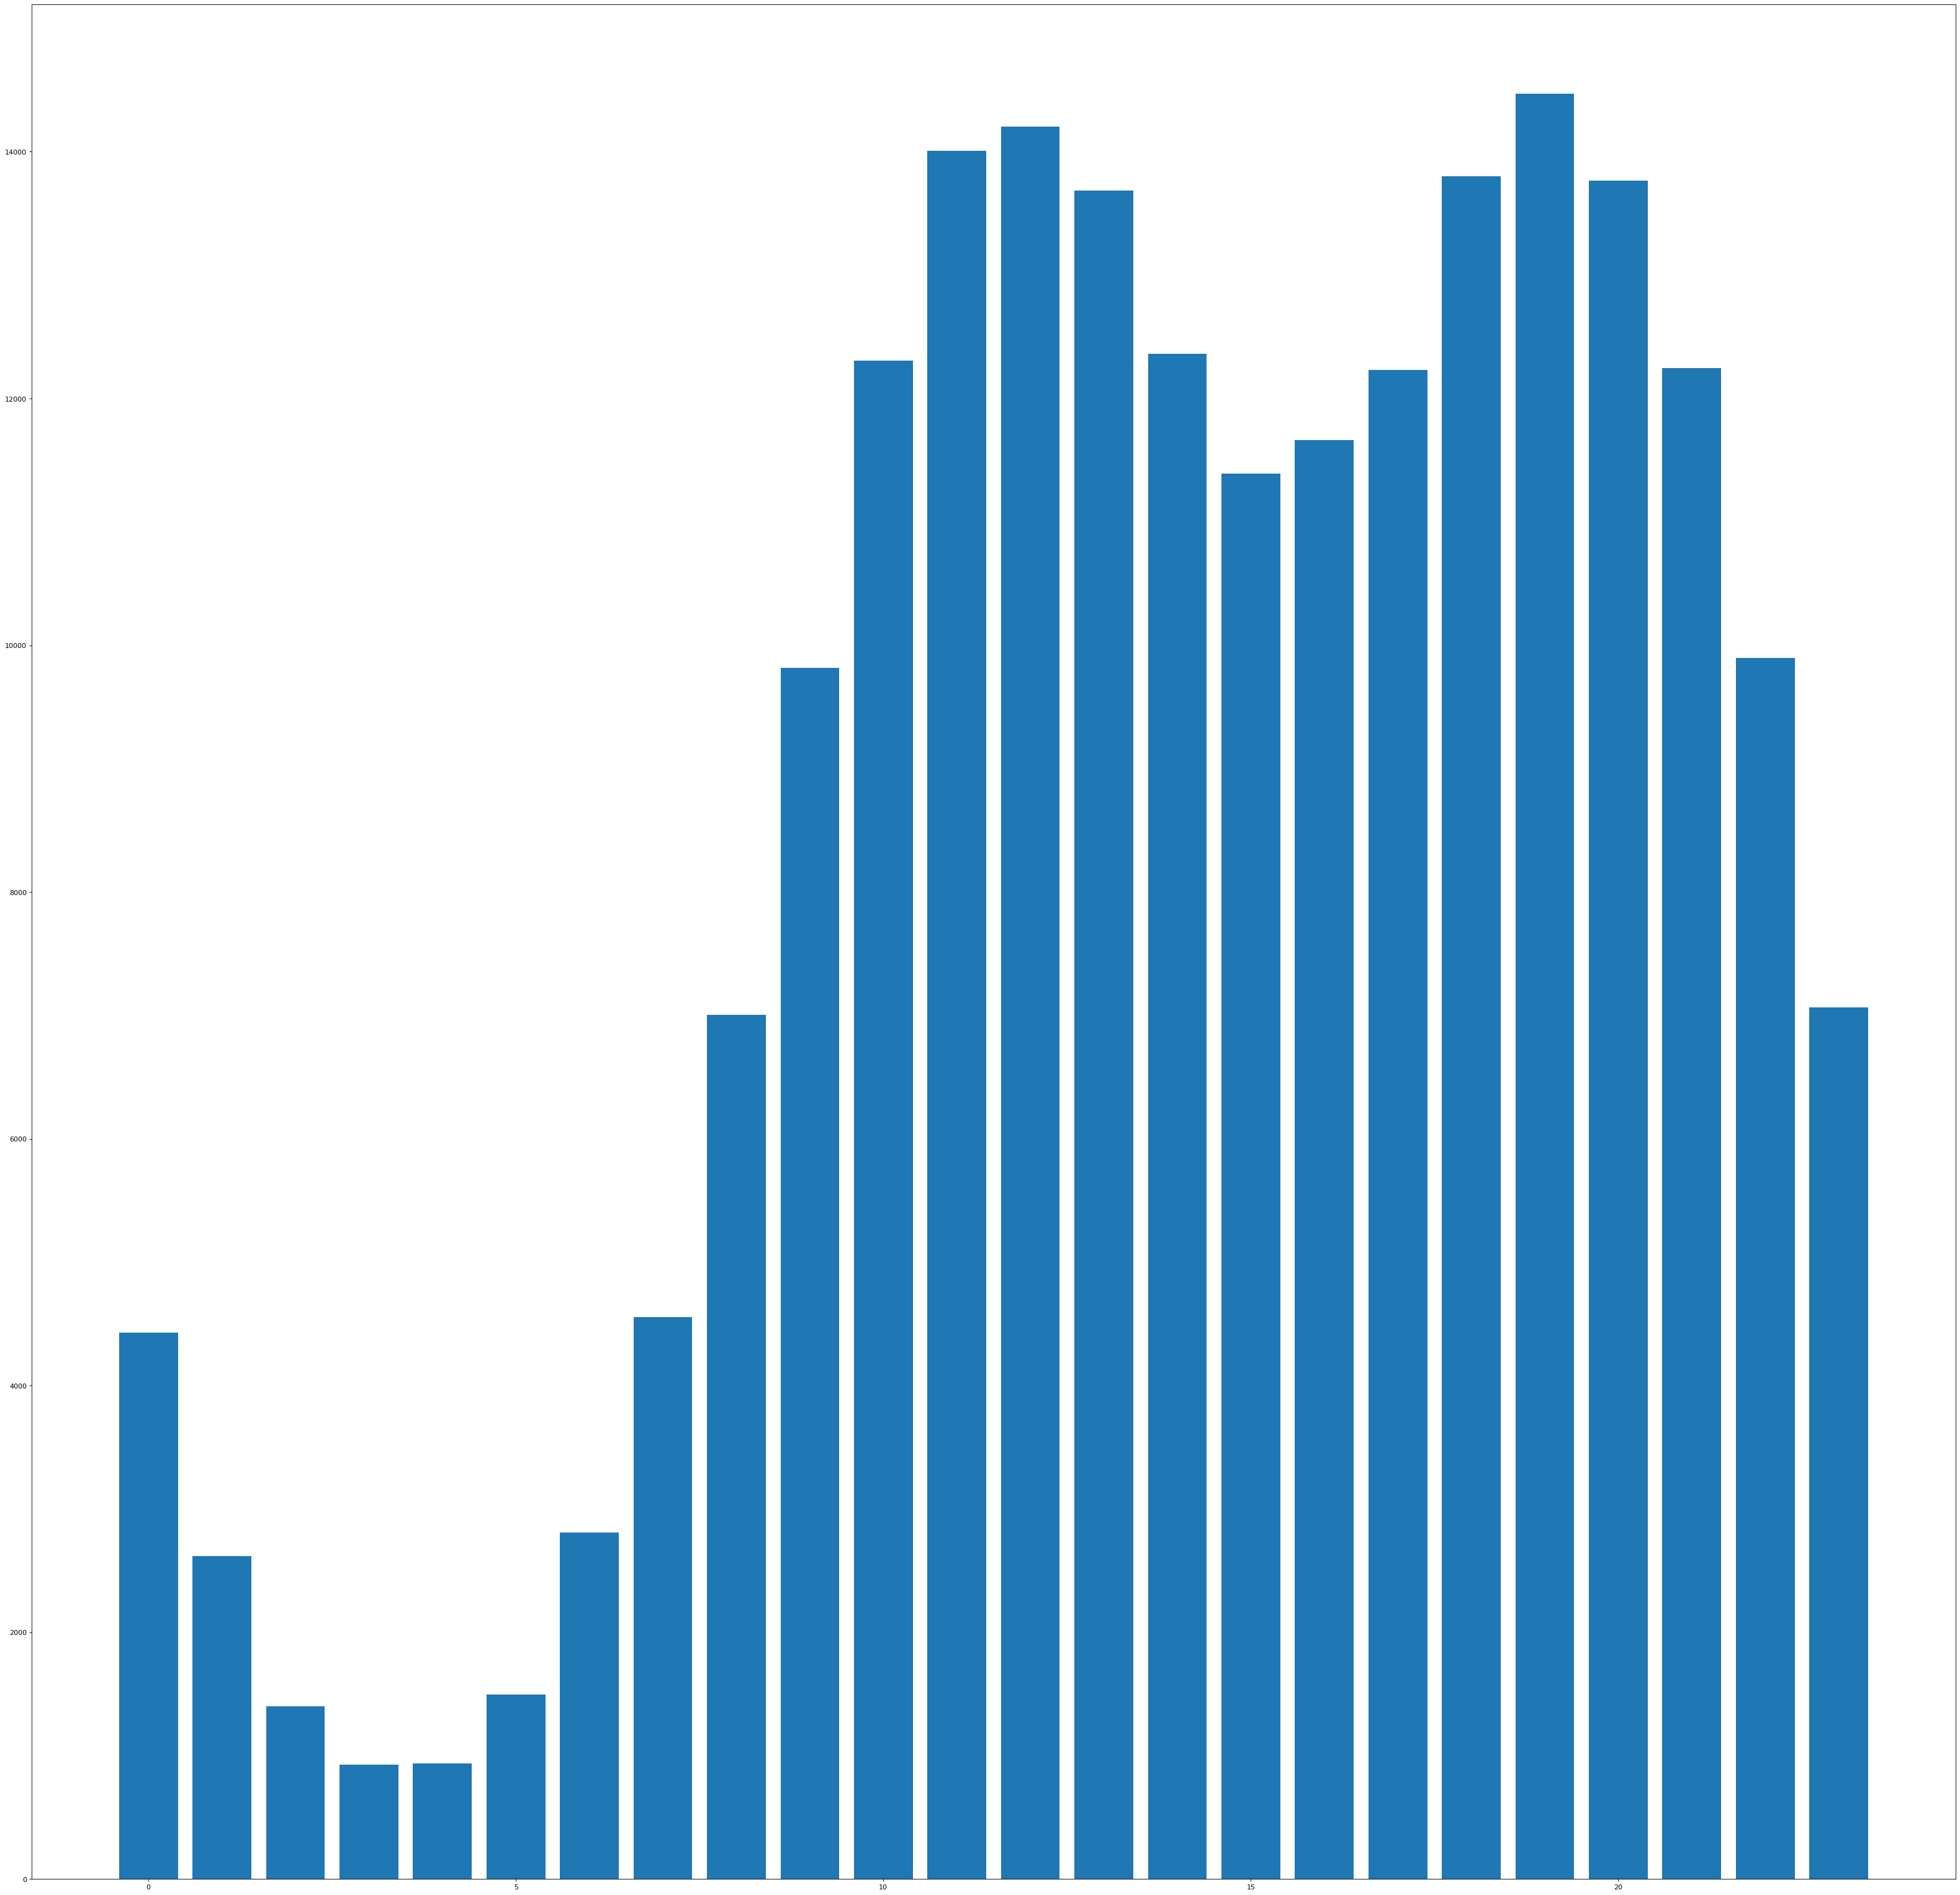

In [ ]:
x= Hour_df.index
height = Hour_df["Quantity Ordered"].values
plt.figure(figsize=(50,50),dpi=80)
plt.bar(x,height)
plt.show
Hour_df[Hour_df["Quantity Ordered"]==Hour_df["Quantity Ordered"].max()]

In [ ]:
hour_df=all_df.groupby('Hour').nunique()[['Order ID']]
hour= hour_df.index
num_transactions= hour_df['Order ID'].values


<function matplotlib.pyplot.show(close=None, block=None)>

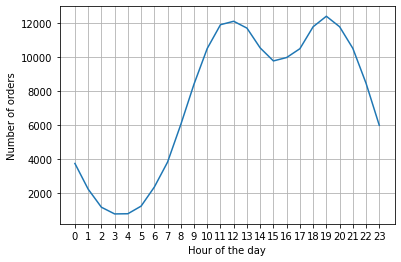

In [ ]:
plt.plot(hour,num_transactions)
plt.xticks(hour)
plt.grid()
plt.xlabel('Hour of the day')
plt.ylabel('Number of orders')
plt.show

In [14]:
order_df=all_df[all_df['Order ID'].duplicated(keep=False)]
order_df = order_df.groupby('Order ID')[['Product']].transform(lambda x:','.join(x))[['Product']]
order_df =order_df.drop_duplicates()
order_df


,Product
3,"Google Phone,Wired Headphones"
18,"Google Phone,USB-C Charging Cable"
30,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,"AAA Batteries (4-pack),Google Phone"
119,"Lightning Charging Cable,USB-C Charging Cable"
...,...
173856,"LG Dryer,27in 4K Gaming Monitor"
174201,"Google Phone,USB-C Charging Cable,Wired Headph..."
176840,"LG Dryer,Lightning Charging Cable"
177793,"ThinkPad Laptop,LG Dryer"


In [ ]:
# products with the highest quantity
quantity_df = all_df.groupby(['Product']).sum()[['Quantity Ordered']]
quantity_df


,Quantity Ordered
Product,
20in Monitor,4129.0
27in 4K Gaming Monitor,6244.0
27in FHD Monitor,7550.0
34in Ultrawide Monitor,6199.0
AA Batteries (4-pack),27635.0
AAA Batteries (4-pack),31017.0
Apple Airpods Headphones,15661.0
Bose SoundSport Headphones,13457.0
Flatscreen TV,4819.0


In [ ]:
product = quantity_df.index
quantity = quantity_df['Quantity Ordered'].values

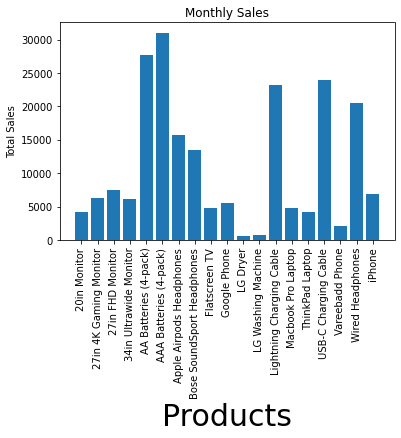

In [ ]:
# plt.figure(figsize=(50,50),dpi=80)
plt.bar(x=product,height=quantity)

plt.xlabel('Products',fontsize =30)
plt.ylabel('Total Sales')
plt.title('Monthly Sales')
plt.xticks(product,rotation ='vertical')
plt.show()


In [16]:
count = Counter()
products = order_df['Product'].values
for p in products:
    p_list =p.split(',')
    count.update(combinations(p_list,2))


In [17]:
count.most_common(5)

[(('Product', 'Product'), 62835),
 (('Google Phone', 'USB-C Charging Cable'), 21),
 (('iPhone', 'Lightning Charging Cable'), 19),
 (('Google Phone', 'Wired Headphones'), 14),
 (('USB-C Charging Cable', 'Wired Headphones'), 12)]

In [ ]:
# for getting both sum and products of diffferent columns
all_df.groupby('Order Id').agg({'Quantity Ordered':'sum','Total':'mean'})


In [ ]:
n =[4,6,8,9]
m =[a**2 if a%2 ==0 else a for a in n]
m